# K-Fold CV for Boosting Methods Using SKLearn 

In [1]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import random

In [2]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\LMS-Khatrib\Anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    conda-4.13.0               |   py39haa95532_0         923 KB
    expat-2.4.4                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    libffi-3.4.2               |       hd77b12b_4         107 KB
    openssl-1.1.1n             |       h2bbff1b_0         4.8 MB
    pcre-8.45                  |       hd77b12b_0 

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\LMS-Khatrib\Anaconda3\pkgs\openssl-1.1.1n-h2bbff1b_0.tar.bz2.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\LMS-Khatrib\Anaconda3\pkgs\openssl-1.1.1n-h2bbff1b_0\Library\bin\libcrypto-1_1-x64.pdb.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\LMS-Khatrib\Anaconda3\pkgs\openssl-1.1.1n-h2bbff1b_0\.cph_tmpdat0b_s8\pkg-openssl-1.1.1n-h2bbff1b_0.tar.zst.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\LMS-Khatrib\Anaconda3\pkgs\openssl-1.1.1n-h2bbff1b_0\Library\bin\libcrypto-1_1-x64.pdb.  

In [3]:
conda install -c anaconda py-xgboost

Note: you may need to restart the kernel to use updated packages.


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\LMS-Khatrib\Anaconda3\pkgs\openssl-1.1.1n-h2bbff1b_0\.cph_tmpz1zsa2z1\pkg-openssl-1.1.1n-h2bbff1b_0.tar.zst.  Please remove this file manually (you may need to reboot to free file handles)
Traceback (most recent call last):
  File "C:\Users\LMS-Khatrib\Anaconda3\Scripts\conda-script.py", line 12, in <module>
  File "C:\Users\LMS-Khatrib\Anaconda3\lib\site-packages\conda\cli\main.py", line 117, in main
    from ..exceptions import conda_exception_handler
  File "C:\Users\LMS-Khatrib\Anaconda3\lib\site-packages\conda\exceptions.py", line 19, in <module>
  File "C:\Users\LMS-Khatrib\Anaconda3\lib\site-packages\conda\models\channel.py", line 13, in <module>
  File "C:\Users\LMS-Khatrib\Anaconda3\lib\site-packages\conda\base\context.py", line 48, in <module>
    from ..common.configuration import (Configuration, ConfigurationLoadError, MapParameter,
  File "C:\Users\LMS-Khatrib\Anaconda3\l


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\LMS-Khatrib\Anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39haa95532_0        1016 KB  anaconda
    ------------------------------------------------------------
                                           Total:        1016 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.13.0-py39hcbf530~ --> anaconda::conda-4.13.0-py39haa95532_0




conda-4.13.0         | 1016 KB   |            |   0% 
conda-4.13.0         | 1016 KB   | 1          |   2% 
conda-4.13.0         | 1016 KB   | #######    |  71% 
conda-4.13.0         | 1016 KB   | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing

In [4]:
conda install -c conda-forge lightgbm


Note: you may need to restart the kernel to use updated packages.


'conda' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
import xgboost as xgb
from sklearn import metrics
from lightgbm import LGBMClassifier

import lightgbm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

C:\Users\LMS-Khatrib\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 300 #define 300 dpi for saving figures

import seaborn as sns
## here are some settings 
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':300}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats

## FIRST ONE --> 17S on 21S

### To load sklearn dataset
sklearn.datasets.load_breast_cancer(*, return_X_y=False, as_frame=False)[source]¶

In [7]:
df1 = pd.read_csv('SRER_2017_training_bi.csv', na_values='?').dropna()  
#'SRER_2017_training_bi.csv' 
df12 = pd.read_csv('SRER21_dataset_v1.csv', na_values='?').dropna()

df = df1.reindex(columns = ["OID_", "Id", "gridcode","Shape_Length", "Shape_Area","CH_mean", "ARVI_mean","ARVI_max","ARVI_med","EVI_mean","EVI_max","EVI_med","NDVI_mean","NDVI_max","NDVI_med","SAVI_mean","SAVI_max","SAVI_med", "Veg_class"])
df2= df12.reindex(columns = ["OID_", "Id", "gridcode","Shape_Length", "Shape_Area","CH_mean", "ARVI_mean","ARVI_max","ARVI_med","EVI_mean","EVI_max","EVI_med","NDVI_mean","NDVI_max","NDVI_med","SAVI_mean","SAVI_max","SAVI_med", "Veg_class"])

bigtest1_df = pd.read_csv('SRER21_pred.csv', na_values='?')
bg1 = bigtest1_df.drop(columns=["Veg_class"])
bigtest1_df = pd.read_csv('SRER21_pred.csv', na_values='?')
bg1 = bigtest1_df.drop(columns=["Veg_class"])
#OID__x,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_max,ARVI_med,EVI_mean,EVI_max,EVI_med,NDVI_mean,NDVI_max,NDVI_med,SAVI_mean,SAVI_max,SAVI_med,Veg_class
bigtest_df = bg1.dropna()
bigtest_df = bigtest_df.reindex(columns = ["OID_", "Id", "gridcode","Shape_Length", "Shape_Area","CH_mean", "ARVI_mean","ARVI_max","ARVI_med","EVI_mean","EVI_max","EVI_med","NDVI_mean","NDVI_max","NDVI_med","SAVI_mean","SAVI_max","SAVI_med", "Veg_class"]).fillna(0)



df= df.replace('woody',1)
df= df.replace('non-woody',0)
df2= df2.replace('woody',1)
df2= df2.replace('non-woody',0)

# Extreme Gradient Boosting

1.5.0


C:\Users\LMS-Khatrib\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


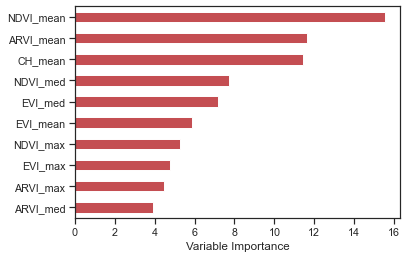

roc_auc_score 0.7449802396736359


C:\Users\LMS-Khatrib\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


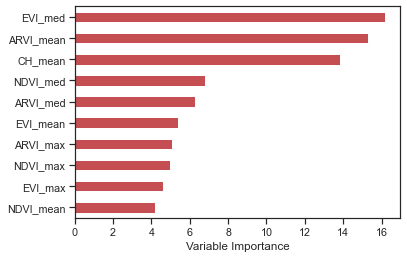

roc_auc_score 0.7465519084785631


C:\Users\LMS-Khatrib\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


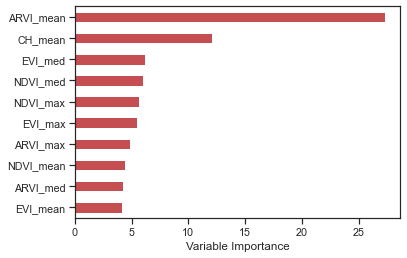

roc_auc_score 0.7507068452380953


C:\Users\LMS-Khatrib\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


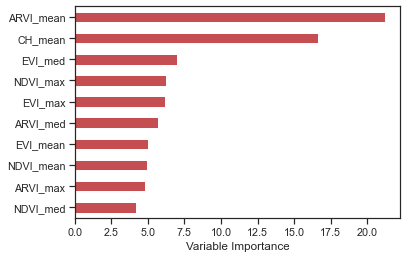

roc_auc_score 0.7864836572133038


C:\Users\LMS-Khatrib\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


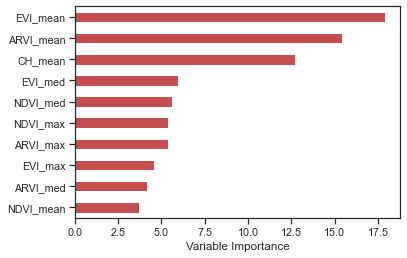

roc_auc_score 0.7696593026350813
---Run time is 1.6974293000000031 seconds ---

Accuracy of each fold: 
 [0.6716589861751152, 0.6877880184331797, 0.6705069124423964, 0.7085253456221198, 0.7093425605536332]

Avg accuracy : 
0.6895643646452888

Std of accuracy : 
0.016956652390631575

Accuracy of each fold: 
 [0.6716589861751152, 0.6877880184331797, 0.6705069124423964, 0.7085253456221198, 0.7093425605536332]
Avg accuracy: 0.6895643646452888
Std of accuracy : 
0.016956652390631575

[[1471  617]
 [ 730 1521]]

              precision    recall  f1-score   support

           0       0.67      0.70      0.69      2088
           1       0.71      0.68      0.69      2251

    accuracy                           0.69      4339
   macro avg       0.69      0.69      0.69      4339
weighted avg       0.69      0.69      0.69      4339

sens  0.7045019157088123
spec  0.6756996890270991
prec  0.6683325761017719
f1_score  0.6859407787363021


In [8]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

# THIS IS CROSS VALIDATION FOR XGB
import xgboost
import xgboost as xgb
from xgboost import XGBClassifier
print(xgboost.__version__)
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
random.seed(1000)
#Implementing cross validation 
kf = KFold(n_splits=5, random_state=1, shuffle=True)
#random_state = sets the seed
#shuffle = randomization
# Create the Extreme GBM
model = XGBClassifier(n_estimators=100, learning_rate = 0.1,use_label_encoder =False,verbose=None,
                max_depth = 5, eval_metric='logloss')
    
from time import time
import timeit #imports timeit module
start_time = timeit.default_timer() #defines start time so computational time can be calculated

acc_score = [];
Truth = [];
Output = [];

for train_index, test_index in kf.split(df):
    X_train , X_test = df.iloc[train_index,5:18], df.iloc[test_index,5:18]
    Y_train , Y_test = df.iloc[train_index,-1], df.iloc[test_index,-1]
    model.fit(X_train, Y_train)
    pred_values = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)
    Truth.extend(Y_test.values.reshape(Y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list 

        #print(model.feature_importances_)
    Importance = pd.DataFrame({'Importance':(model.feature_importances_*100)[0:10]}, index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    plt.show()
        #plt.savefig('plot1.png')

        ##################################################
        #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
        #Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    print("roc_auc_score", roc_auc_score(Y_test, pred_prob))

elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))

#from here

print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print("sens ",sensitivity)
print("spec ", specificity)
print("prec ", precision)
print("f1_score ", f1_score) 

In [9]:
# fixed for sens/spec
#THIS ISS FOR THE TESTING ONLY 
Truth2 = []
Output2 = []
testing = df2.iloc[:,-1]
model.fit(df.iloc[:,5:18],df.iloc[:,-1])
predicted = model.predict(df2.iloc[:,5:18])
acc = accuracy_score(testing, predicted)
Truth2.extend(testing.values.reshape(testing.shape[0])); ## it is a list
Output2.extend(predicted);
print(confusion_matrix(Truth2, Output2))
print()
print(classification_report(Truth2, Output2))

cm2 = confusion_matrix(Truth2, Output2)

sensitivity = cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity = cm2[1][1]/(cm2[1][0]+cm2[1][1])
precision = (cm2[0][0])/(cm2[0][0]+cm2[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
print("predicted",predicted)
print("acc",acc)
print("sens ",specificity) 
print("spec ", sensitivity) 
print("prec ", precision)
print("f1_score ", f1_score)

C:\Users\LMS-Khatrib\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[[ 807 1423]
 [ 225 4350]]

              precision    recall  f1-score   support

           0       0.78      0.36      0.49      2230
           1       0.75      0.95      0.84      4575

    accuracy                           0.76      6805
   macro avg       0.77      0.66      0.67      6805
weighted avg       0.76      0.76      0.73      6805

predicted [1 1 1 ... 1 1 1]
acc 0.7578251285819251
sens  0.9508196721311475
spec  0.3618834080717489
prec  0.7819767441860465
f1_score  0.4947884733292459


In [10]:
finalPredicted = model.predict(bigtest_df.iloc[:,5:18])
bigtest_df["Veg_class"] = finalPredicted

In [11]:
woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = -1
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"]:
    index += 1
    if i == 1:
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == 0:
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1

FWCXGB = woodyarea / totalarea * 100

In [12]:
print(FWCXGB)

61.136170737137085


# Reference: 

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

max_depth (int, optional (default=-1)) – Maximum tree depth for base learners, <=0 means no limit.

learning_rate (float, optional (default=0.1)) – Boosting learning rate. You can use callbacks parameter of fit method to shrink/adapt learning rate in training using reset_parameter callback. Note, that this will ignore the learning_rate argument in training.

n_estimators (int, optional (default=100)) – Number of boosted trees to fit.

eval_metric (str, callable, list or None, optional (default=None)) – If str, it should be a built-in evaluation metric to use. If callable, it should be a custom evaluation metric, see note below for more details. If list, it can be a list of built-in metrics, a list of custom evaluation metrics, or a mix of both. In either case, the metric from the model parameters will be evaluated and used as well. 
Default: ‘l2’ for LGBMRegressor, **‘logloss’ for LGBMClassifier**, ‘ndcg’ for LGBMRanker.


[1]	training's binary_logloss: 0.66859	valid_0's binary_logloss: 0.676304
[2]	training's binary_logloss: 0.648127	valid_0's binary_logloss: 0.662072
[3]	training's binary_logloss: 0.630771	valid_0's binary_logloss: 0.650296
[4]	training's binary_logloss: 0.615183	valid_0's binary_logloss: 0.640509
[5]	training's binary_logloss: 0.601424	valid_0's binary_logloss: 0.631712
[6]	training's binary_logloss: 0.589587	valid_0's binary_logloss: 0.624349
[7]	training's binary_logloss: 0.578811	valid_0's binary_logloss: 0.618102
[8]	training's binary_logloss: 0.569133	valid_0's binary_logloss: 0.613137
[9]	training's binary_logloss: 0.560736	valid_0's binary_logloss: 0.609465
[10]	training's binary_logloss: 0.55292	valid_0's binary_logloss: 0.605083
[11]	training's binary_logloss: 0.54537	valid_0's binary_logloss: 0.601173
[12]	training's binary_logloss: 0.538556	valid_0's binary_logloss: 0.597931
[13]	training's binary_logloss: 0.532547	valid_0's binary_logloss: 0.59544
[14]	training's binary_lo

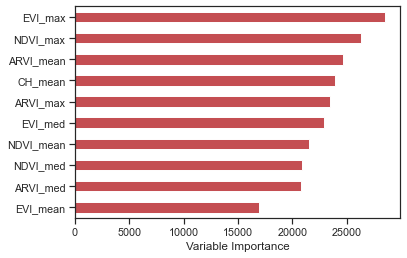

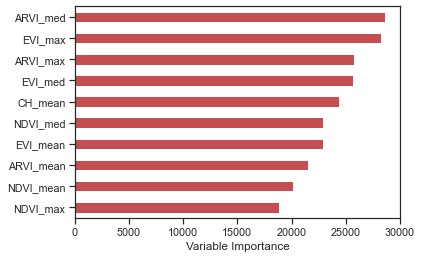

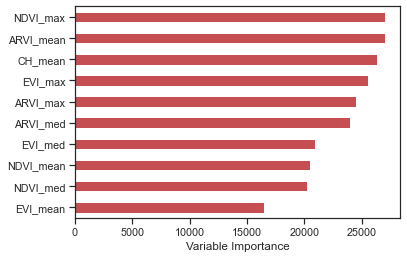

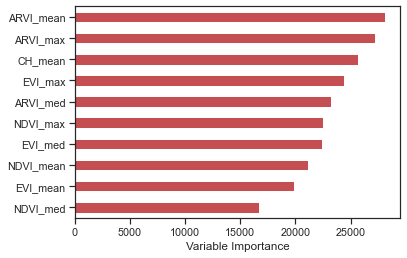

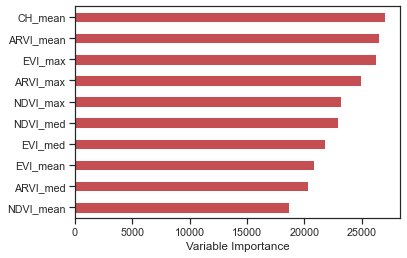

In [13]:
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
import lightgbm
random.seed(1000)
#Implementing cross validation 
kf = KFold(n_splits=5, random_state=1, shuffle=True)
model = lightgbm.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)

from time import time
import timeit #imports timeit module
start_time = timeit.default_timer() #defines start time so computational time can be calculated

acc_score = [];
Truth = [];
Output = [];
 
for train_index , test_index in kf.split(df):
    
    X_train , X_test = df.iloc[train_index,5:18], df.iloc[test_index,5:18]
    Y_train , Y_test = df.iloc[train_index,-1], df.iloc[test_index,-1]
    
    # Create the LightGBM data containers
    model.fit(X_train,Y_train,eval_set=[(X_test,Y_test),(X_train,Y_train)],
          eval_metric='logloss')

    pred_values = model.predict(X_test)
     
    acc = accuracy_score(Y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(Y_test.values.reshape(Y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list  
    
    #print(model.feature_importances_)
    Importance = pd.DataFrame({'Importance':(model.feature_importances_*100)[0:10]}, 
                          index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    #plt.savefig('plot1.png')


elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
#start here

print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print("sens ",sensitivity)
print("spec ", specificity)
print("prec ", precision)
print("f1_score ", f1_score)


In [14]:
# THIS IS TESTING ONLY
Truth2 = []
Output2 = []
testing = df2.iloc[:,-1]
model.fit(df.iloc[:,5:18],df.iloc[:,-1])
predicted = model.predict(df2.iloc[:,5:18])
acc = accuracy_score(testing, predicted)
Truth2.extend(testing.values.reshape(testing.shape[0])); ## it is a list
Output2.extend(predicted);
print(confusion_matrix(Truth2, Output2))
print()
print(classification_report(Truth2, Output2))

cm2 = confusion_matrix(Truth2, Output2)

sensitivity = cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity = cm2[1][1]/(cm2[1][0]+cm2[1][1])
precision = (cm2[0][0])/(cm2[0][0]+cm2[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
print("predicted",predicted)
print("acc",acc)
print("sens ",specificity) 
print("spec ", sensitivity) 
print("prec ", precision)
print("f1_score ", f1_score) 

[[ 812 1418]
 [ 282 4293]]

              precision    recall  f1-score   support

           0       0.74      0.36      0.49      2230
           1       0.75      0.94      0.83      4575

    accuracy                           0.75      6805
   macro avg       0.75      0.65      0.66      6805
weighted avg       0.75      0.75      0.72      6805

predicted [1 1 1 ... 1 1 1]
acc 0.7501836884643645
sens  0.9383606557377049
spec  0.36412556053811657
prec  0.7422303473491774
f1_score  0.48856799037304455


In [15]:
finalPredicted = model.predict(bigtest_df.iloc[:,5:18])
bigtest_df["Veg_class"] = finalPredicted

In [16]:
woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = -1
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"]:
    index += 1
    if i == 1:
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == 0:
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1

FWCLGBM = woodyarea / totalarea * 100

In [17]:
print(FWCLGBM)

61.37521670258895


In [18]:
##### print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      2088
           1       0.70      0.67      0.68      2251

    accuracy                           0.68      4339
   macro avg       0.68      0.68      0.68      4339
weighted avg       0.68      0.68      0.68      4339



# CatBoosting

In [19]:
conda install -c conda-forge catboost

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::certifi-2021.10.8-py39haa95532_2
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::certifi-2021.10.8-py39haa

In [20]:
# https://catboost.ai/en/docs/concepts/python-quickstart
import catboost as cb
from catboost import CatBoostClassifier


print ('catboost version', cb.__version__)

catboost version 1.0.6


---Run time is 0.9105370999999991 seconds ---

Accuracy of each fold: 
 [0.6797235023041475, 0.6935483870967742, 0.6912442396313364, 0.7016129032258065, 0.7012687427912342]

Avg accuracy : 
0.6934795550098597

Std of accuracy : 
0.008013153664261571

Accuracy of each fold: 
 [0.6797235023041475, 0.6935483870967742, 0.6912442396313364, 0.7016129032258065, 0.7012687427912342]
Avg accuracy: 0.6934795550098597
Std of accuracy : 
0.008013153664261571

[[1507  581]
 [ 749 1502]]

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      2088
           1       0.72      0.67      0.69      2251

    accuracy                           0.69      4339
   macro avg       0.69      0.69      0.69      4339
weighted avg       0.70      0.69      0.69      4339

sens  0.7217432950191571
spec  0.667258996001777
prec  0.6679964539007093
f1_score  0.6938305709023942


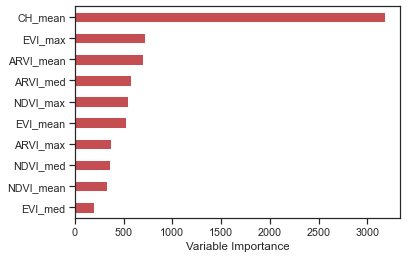

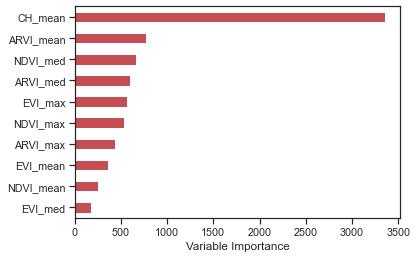

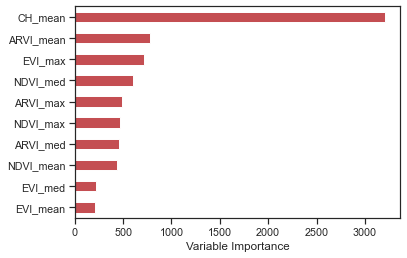

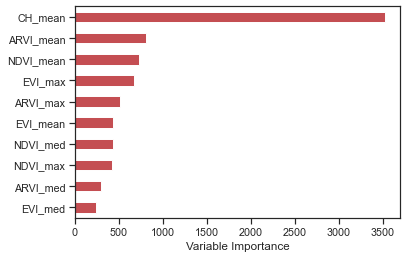

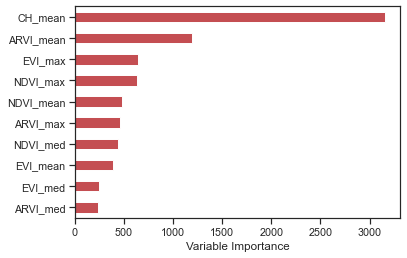

In [21]:
#Implementing cross validation 
random.seed(1000)
kf = KFold(n_splits=5, random_state=1, shuffle=True)

from time import time
import timeit #imports timeit module
start_time = timeit.default_timer() #defines start time so computational time can be calculated

acc_score = [];
Truth = [];
Output = [];
 
for train_index , test_index in kf.split(df):
    
    X_train , X_test = df.iloc[train_index,5:18], df.iloc[test_index,5:18]
    y_train , y_test = df.iloc[train_index,-1], df.iloc[test_index,-1]
    
    # Create CatBoost model
    model = CatBoostClassifier(iterations=100,
                           depth=4,
                           learning_rate=0.1,
                           loss_function='Logloss')
    # train the model
    model.fit(X_train, y_train, verbose=False)
    # make the prediction using the resulting model
    pred_values = model.predict(X_test)
    #preds_proba = model.predict_proba(test_data)
    #print("class = ", preds_class)
    #print("proba = ", preds_proba)
     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list  
    
    #print(model.feature_importances_)
    Importance = pd.DataFrame({'Importance':(model.feature_importances_*100)[0:10]}, 
                          index = (X_train.columns)[0:10])
    Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r')
    plt.xlabel('Variable Importance')
    plt.gca().legend_ = None
    #plt.savefig('plot1.png')


elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))

#start here

print()
print('Accuracy of each fold: \n {}'.format(acc_score))
print("Avg accuracy: {}".format(np.mean(acc_score)))
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print()
print(confusion_matrix(Truth, Output))
print()
print(classification_report(Truth, Output))

cm = confusion_matrix(Truth, Output)

sensitivity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity = cm[1][1]/(cm[1][0]+cm[1][1])
precision = (cm[0][0])/(cm[0][0]+cm[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

print("sens ",sensitivity)
print("spec ", specificity)
print("prec ", precision)
print("f1_score ", f1_score)



In [22]:
# TESTING ONLY
Truth2 = []
Output2 = []
testing = df2.iloc[:,-1]
model.fit(df.iloc[:,5:18],df.iloc[:,-1])
predicted = model.predict(df2.iloc[:,5:18])
acc = accuracy_score(testing, predicted)
Truth2.extend(testing.values.reshape(testing.shape[0])); ## it is a list
Output2.extend(predicted);
print(confusion_matrix(Truth2, Output2))
print()
print(classification_report(Truth2, Output2))

cm2 = confusion_matrix(Truth2, Output2)

sensitivity = cm2[0][0]/(cm2[0][0]+cm2[0][1])
specificity = cm2[1][1]/(cm2[1][0]+cm2[1][1])
precision = (cm2[0][0])/(cm2[0][0]+cm2[1][0])
f1_score = (2*precision*sensitivity)/(precision+sensitivity)
print("predicted",predicted)
print("acc",acc)
print("sens ",specificity) 
print("spec ", sensitivity) 
print("prec ", precision)
print("f1_score ", f1_score) 

0:	learn: 0.6775898	total: 1.14ms	remaining: 113ms
1:	learn: 0.6652629	total: 2.38ms	remaining: 117ms
2:	learn: 0.6541130	total: 3.31ms	remaining: 107ms
3:	learn: 0.6430047	total: 4.43ms	remaining: 106ms
4:	learn: 0.6338710	total: 5.76ms	remaining: 109ms
5:	learn: 0.6256355	total: 6.91ms	remaining: 108ms
6:	learn: 0.6181768	total: 8.23ms	remaining: 109ms
7:	learn: 0.6122011	total: 9.3ms	remaining: 107ms
8:	learn: 0.6085327	total: 10.4ms	remaining: 106ms
9:	learn: 0.6042321	total: 11.5ms	remaining: 103ms
10:	learn: 0.5998646	total: 12.6ms	remaining: 102ms
11:	learn: 0.5963177	total: 13.6ms	remaining: 100ms
12:	learn: 0.5929588	total: 14.7ms	remaining: 98.5ms
13:	learn: 0.5902978	total: 15.8ms	remaining: 97ms
14:	learn: 0.5879870	total: 16.8ms	remaining: 95.3ms
15:	learn: 0.5863904	total: 17.9ms	remaining: 93.8ms
16:	learn: 0.5842604	total: 18.9ms	remaining: 92.1ms
17:	learn: 0.5825136	total: 19.9ms	remaining: 90.8ms
18:	learn: 0.5805750	total: 21.1ms	remaining: 89.8ms
19:	learn: 0.57911

In [23]:
finalPredicted = model.predict(bigtest_df.iloc[:,5:18])
bigtest_df["Veg_class"] = finalPredicted

In [24]:
woodyarea = 0
nonwoodyarea = 0 
totalarea = 0
index = -1
woody = 0
nw = 0
#print(bigtest_df.iat[index,4])
area = bigtest_df["Shape_Area"]
#print(area)

for i in bigtest_df["Veg_class"]:
    index += 1
    if i == 1:
        totalarea += bigtest_df.iat[index,4]
        woodyarea += bigtest_df.iat[index,4]
        #print(woodyarea)
        woody += 1
    if i == 0:
        totalarea += bigtest_df.iat[index,4]
        nonwoodyarea += bigtest_df.iat[index,4]
        #print(nonwoodyarea)
        nw += 1

FWCCat = woodyarea / totalarea * 100

In [25]:
print(FWCCat)

78.57337012784272


## Final Preds

In [26]:
print("XGB = " + str(FWCXGB))
print("LGBM = " + str(FWCLGBM))
print("CatBoosting = " + str(FWCCat))

XGB = 61.136170737137085
LGBM = 61.37521670258895
CatBoosting = 78.57337012784272


# Please neglect: The following are some codes to be developed

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.Dataset.html